- Create a static machine learning model based on batch data. The dataset that is used is from top secret files obtained from our allies Ring Canada (RC) and the Cyber Threat Intelligence (CTI). The dataset provided to you has DNS traffic generated by exfiltrating various filetypes ranging from small to large sizes. ​

- The aim of the task is to implement a binary classifier aiming at predicting data exfiltration via DNS.​

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import time
from numpy import nan
from numpy import inf

# Exploratory Data Analysis (EDA)

In [2]:
S_dataset= pd.read_csv("Static_dataset.csv")

In [3]:
S_dataset.shape

(268074, 16)

In [4]:
S_dataset.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [5]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [6]:
S_dataset.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


In [7]:
def get_accuracies(y_actual, y_predict):
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
  print('\nClassification Report:\n')
  print(classification_report(y_actual, y_predict))
  print('\nConfusion Matrix:\n')
  cm = confusion_matrix(y_actual, y_predict)
  print(cm)
  print('\nAccuracy Score:\n')
  print(accuracy_score(y_actual, y_predict))
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())

# Data Cleaning

In [8]:
S_dataset['longest_word'].value_counts()

2          109981
4           70188
N            4498
C            2969
9            1906
            ...  
yaa             1
queue           1
kit             1
airdrop         1
mal             1
Name: longest_word, Length: 6224, dtype: int64

In [9]:
S_dataset['sld'].value_counts()

192                                 109517
224                                  70188
FHEPFCELEHFCEPFFFACACACACACACABN      4498
DESKTOP-3JF04TC                       1961
239                                   1906
                                     ...  
freesgift                                1
secureserver                             1
airdropalert                             1
queue-it                                 1
lahemal                                  1
Name: sld, Length: 11112, dtype: int64

In [10]:
#replace the string to integer number 
S_dataset['longest_word'] = S_dataset['longest_word'].replace(r'(([a-z]+)|([A-Z]+))',2, regex=True)
S_dataset['longest_word'].fillna(2,inplace=True)
S_dataset['longest_word']=S_dataset['longest_word'] .astype('int') 
S_dataset['sld'] = S_dataset['sld'].replace(r'(([a-z]+)|([A-Z]+|(0-1)))',192, regex=True)
S_dataset['sld']=S_dataset['sld'] .astype('int') 
S_dataset=S_dataset.drop(labels = ["timestamp"], axis=1)

In [11]:
S_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   FQDN_count        268074 non-null  int64  
 1   subdomain_length  268074 non-null  int64  
 2   upper             268074 non-null  int64  
 3   lower             268074 non-null  int64  
 4   numeric           268074 non-null  int64  
 5   entropy           268074 non-null  float64
 6   special           268074 non-null  int64  
 7   labels            268074 non-null  int64  
 8   labels_max        268074 non-null  int64  
 9   labels_average    268074 non-null  float64
 10  longest_word      268074 non-null  int32  
 11  sld               268074 non-null  int32  
 12  len               268074 non-null  int64  
 13  subdomain         268074 non-null  int64  
 14  Target Attack     268074 non-null  int64  
dtypes: float64(2), int32(2), int64(11)
memory usage: 28.6 MB


In [12]:
S_dataset.to_csv('static.csv', index=False,header=True)

In [13]:
S_dataset.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,2.573815,212.637932,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,1.035046,2005.411184,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,0.000000,13.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,2.000000,192.000000,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,2.000000,192.000000,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,4.000000,224.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,9.000000,365838.000000,33.000000,1.000000,1.000000


C:\Users\saiko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

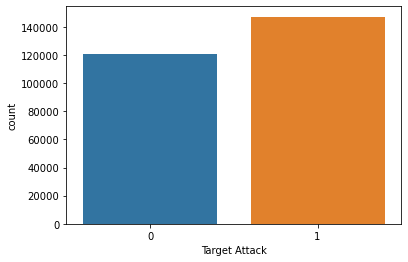

In [14]:
sns.countplot(S_dataset['Target Attack'])

In [15]:
S_dataset.skew()

FQDN_count           -1.101731
subdomain_length     -0.590480
upper                 5.988737
lower                 0.343449
numeric              -0.594384
entropy              -0.140156
special              -0.902972
labels               -0.903680
labels_max            3.979910
labels_average        5.087081
longest_word          2.269378
sld                 180.987411
len                   2.634801
subdomain            -1.176397
Target Attack        -0.197046
dtype: float64

<AxesSubplot:xlabel='FQDN_count', ylabel='Density'>

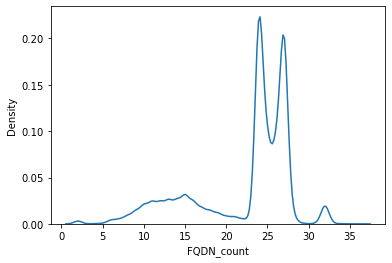

In [16]:
sns.kdeplot(data=S_dataset, x="FQDN_count")

<AxesSubplot:xlabel='labels_max', ylabel='Density'>

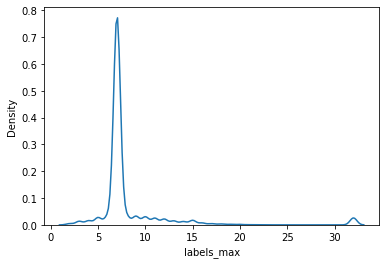

In [17]:
sns.kdeplot(data=S_dataset, x="labels_max")

C:\Users\saiko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longest_word', ylabel='count'>

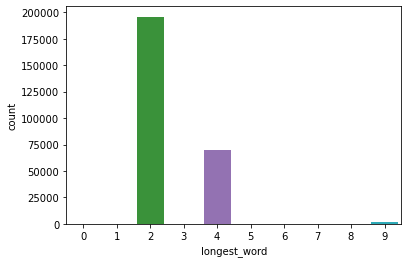

In [18]:
sns.countplot(S_dataset['longest_word'])

C:\Users\saiko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sld', ylabel='count'>

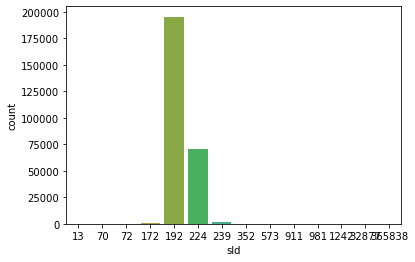

In [19]:
sns.countplot(S_dataset['sld'])

In [20]:
S_dataset.isnull().sum()

FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

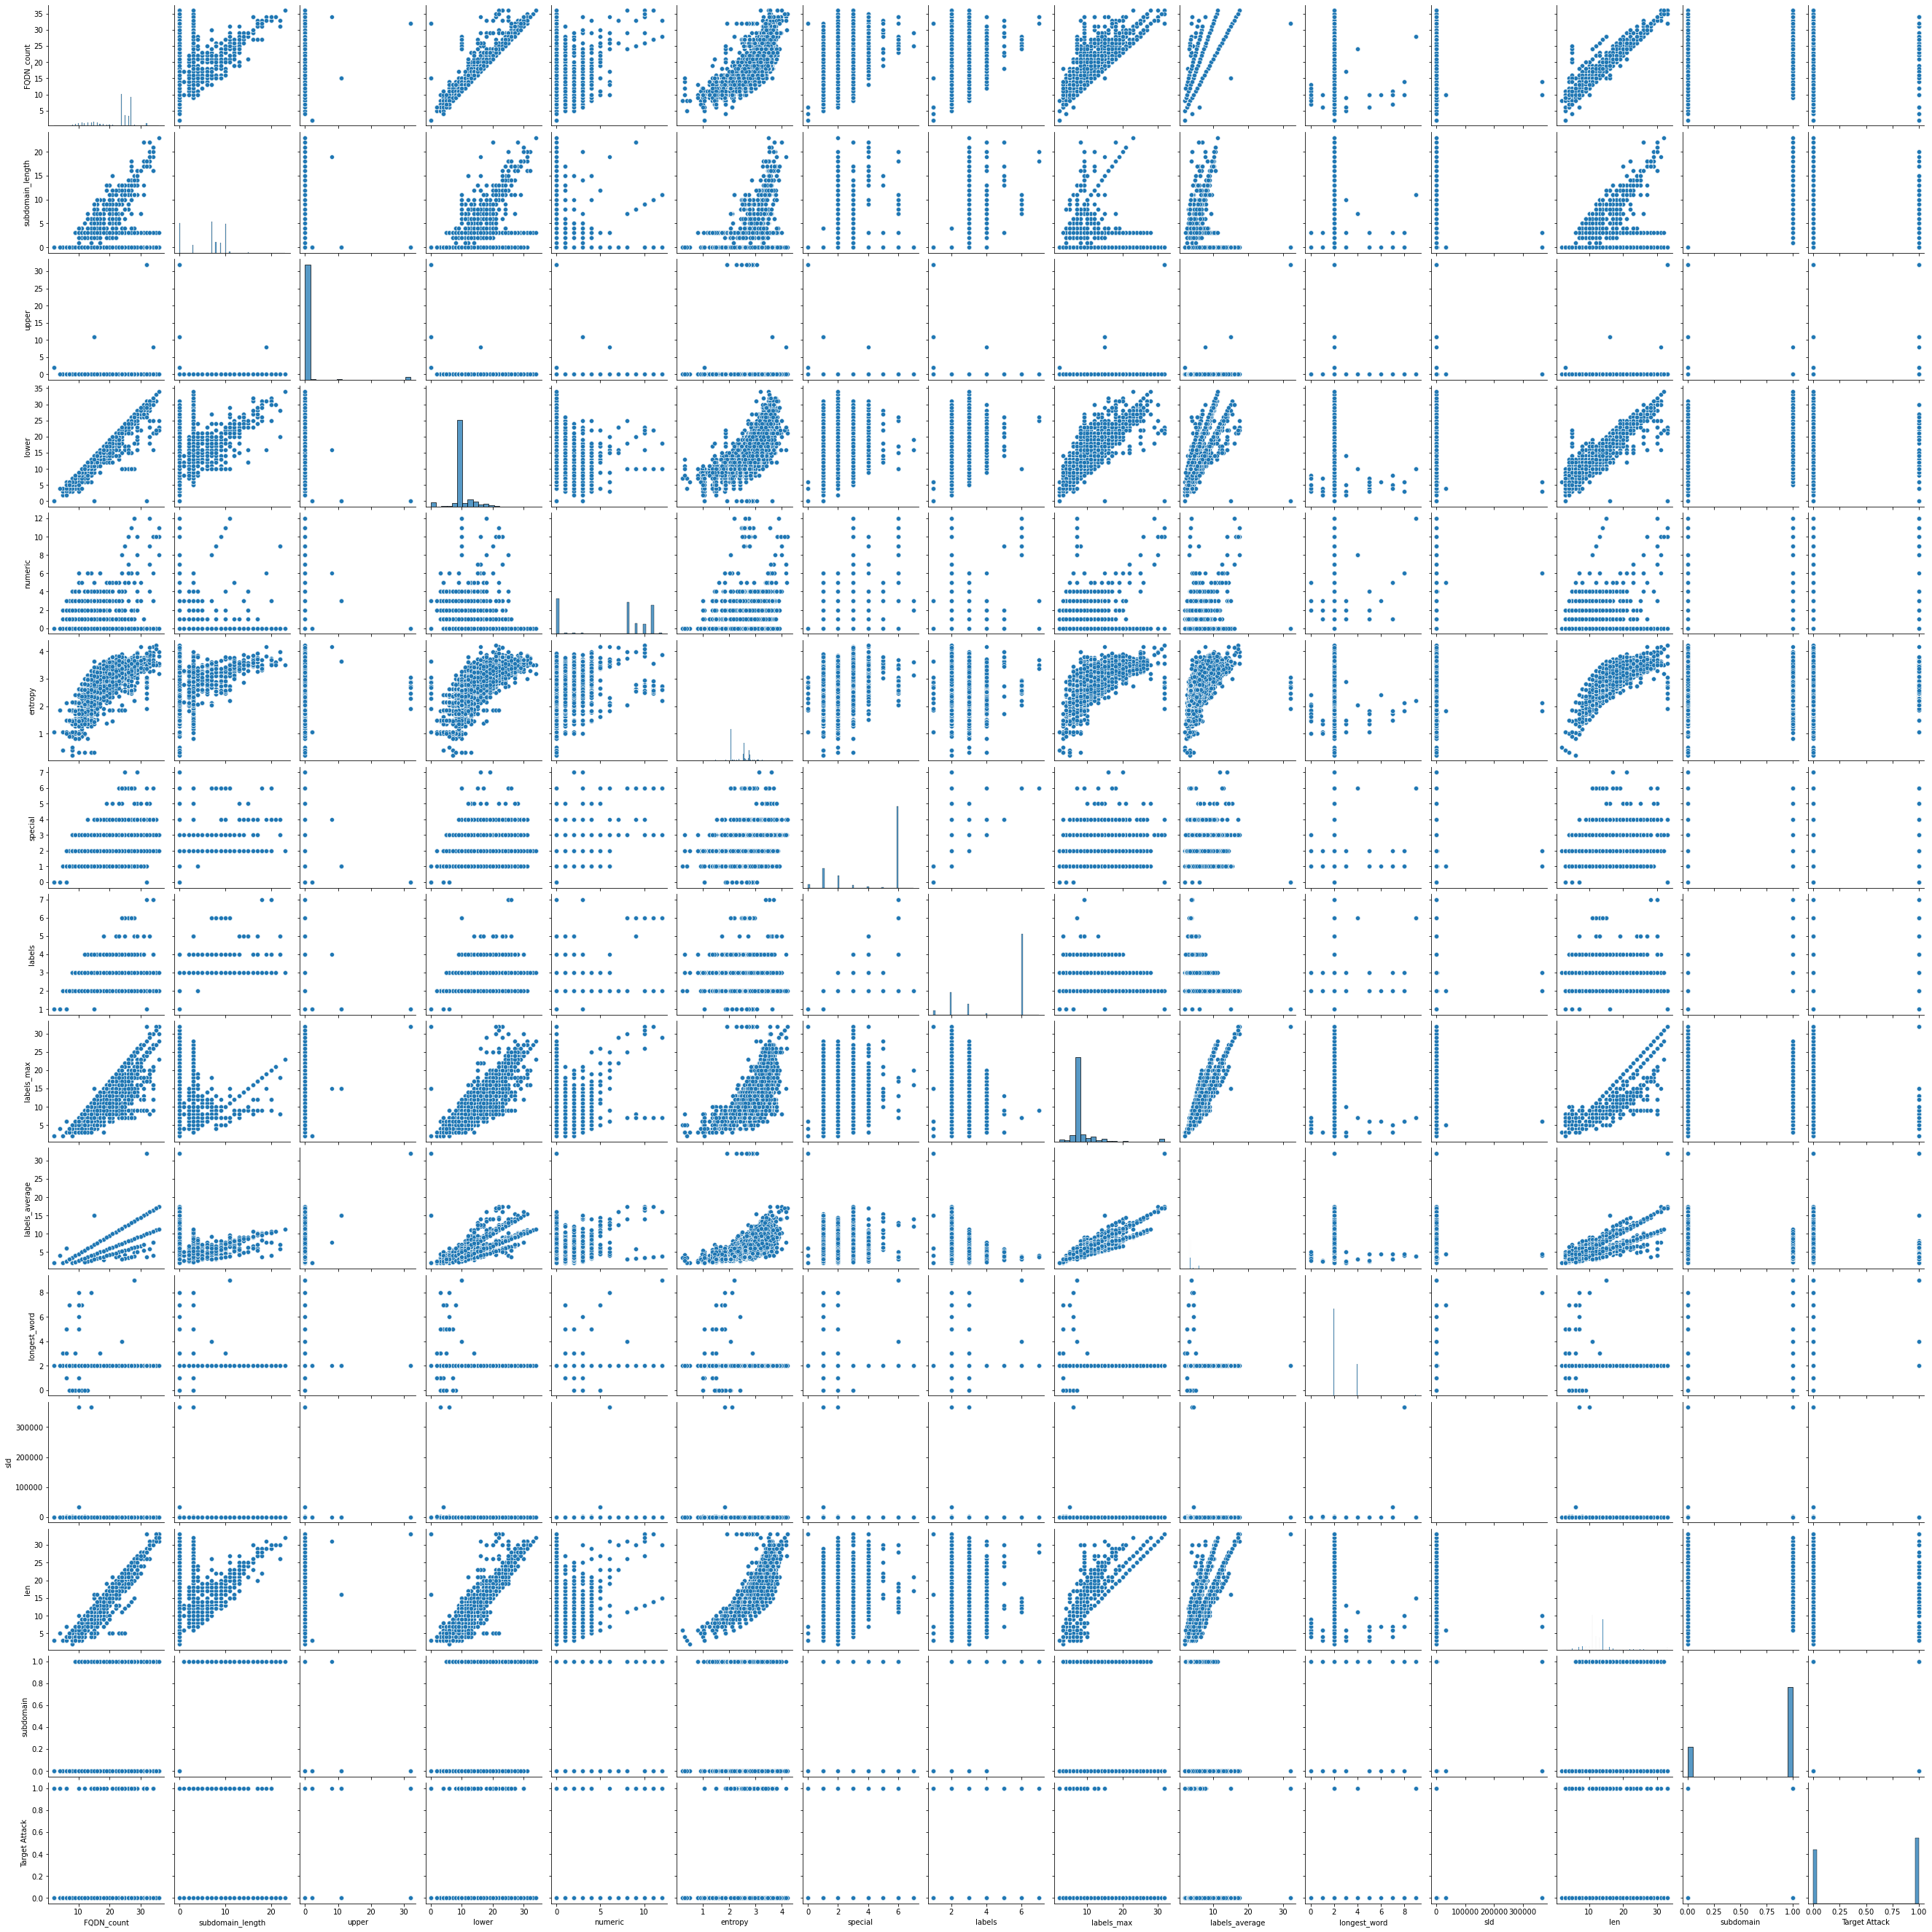

In [ ]:
# Basic correlogram
sns.pairplot(S_dataset)
plt.show()



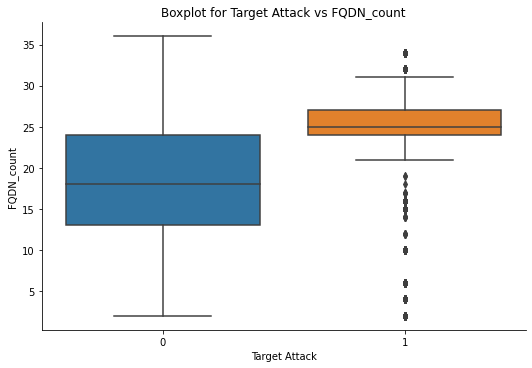

In [23]:
sns.catplot(x="Target Attack", y="FQDN_count", data=S_dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Target Attack vs FQDN_count")
plt.show()

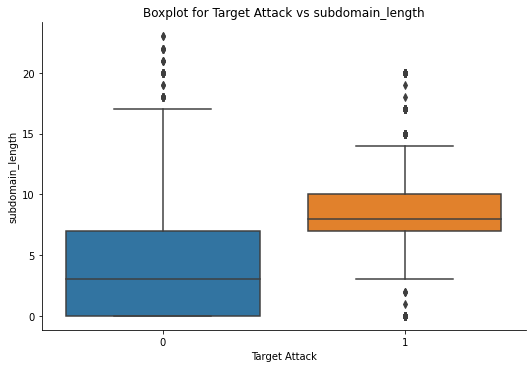

In [24]:
sns.catplot(x="Target Attack", y="subdomain_length", data=S_dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Target Attack vs subdomain_length")
plt.show()

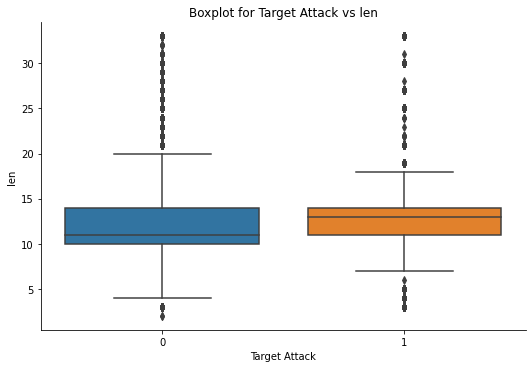

In [25]:
sns.catplot(x="Target Attack", y="len", data=S_dataset, kind="box", aspect=1.5)
plt.title("Boxplot for Target Attack vs len")
plt.show()

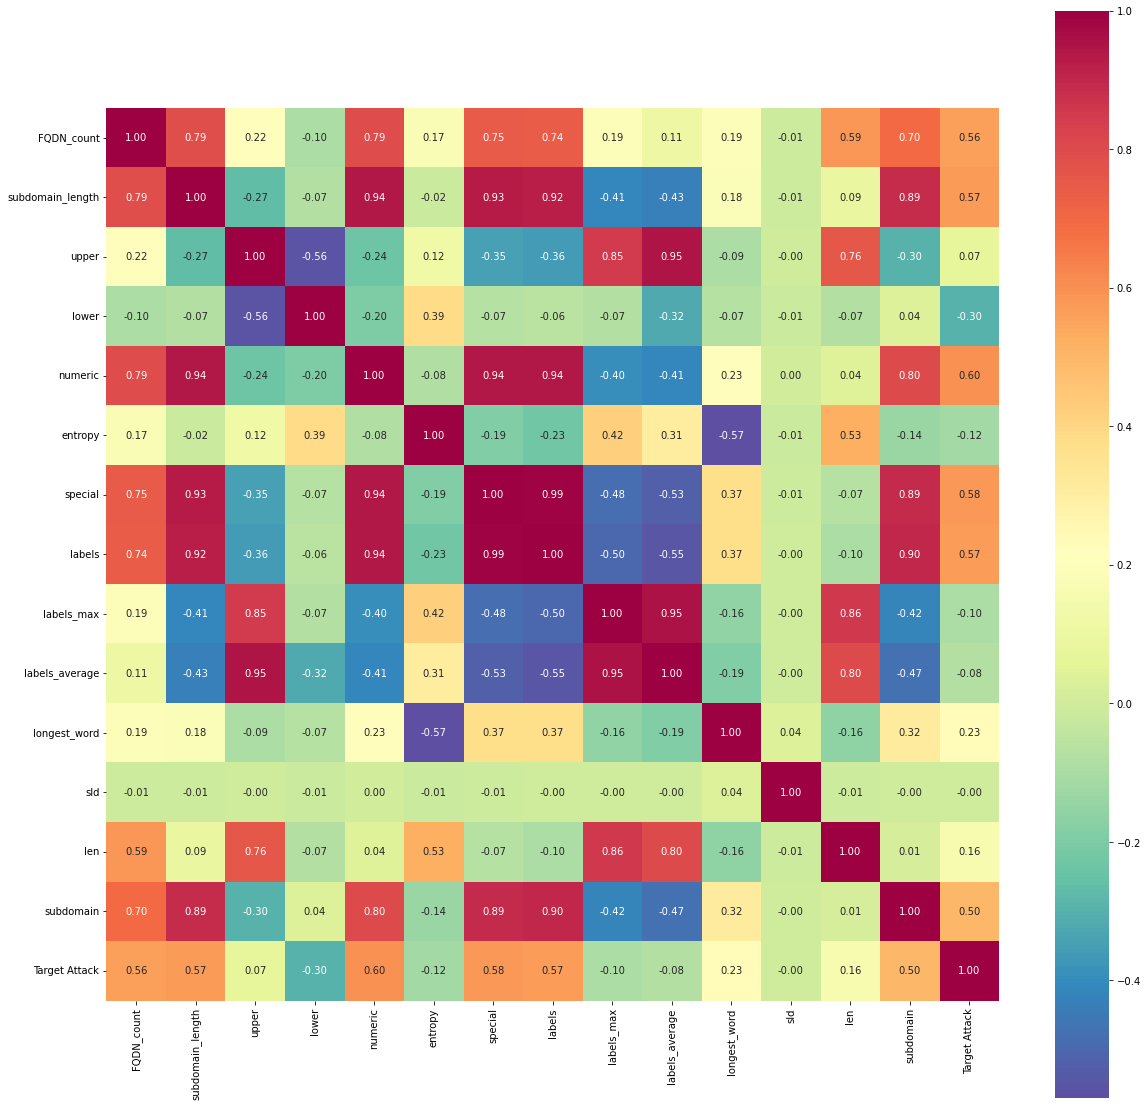

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
corrmat = S_dataset.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=S_dataset.columns, 
                 xticklabels=S_dataset.columns, 
                 cmap="Spectral_r")
plt.show()

# Data Splitting

In [21]:
X=S_dataset.drop(labels = ["Target Attack"], axis=1) 
y=S_dataset["Target Attack"]

In [22]:
! pip install fast_ml

In [23]:
#split the data into training, validation and testing
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(S_dataset, target = 'Target Attack', train_size=0.8, valid_size=0.1, test_size=0.1)


In [24]:
print(X_train.shape)#, 
print(y_train.shape)
print(X_valid.shape)#, 
print(y_valid.shape)
print(X_test.shape)#, 
print(y_test.shape)

(214459, 14)
(214459,)
(26807, 14)
(26807,)
(26808, 14)
(26808,)


In [25]:
from sklearn import preprocessing

In [26]:
#Normalize dataset
def Normalize(df):
    df_max_scaled=df
    for column in df_max_scaled.columns:
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
    return df_max_scaled


In [27]:
X_train_Normalize=Normalize(X_train)

X_valid_Normalize=Normalize(X_valid)

X_test_Normalize=Normalize(X_test)


# Filter Selection

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

In [35]:
def select_feature(X_train, y_train, X_test, y_test, FSM, model):
  fs = FSM
  fs.fit(X_train, y_train.values.ravel())
  X_train_new = fs.transform(X_train)
  X_test_new = fs.transform(X_test) 
  X.columns[fs.get_support(indices=True)]
  # 1st way to get the list
  vector_names = list(X.columns[fs.get_support(indices=True)])
  #print(vector_names)
  model.fit(X_train_new, y_train.values.ravel())
  y_pred = model.predict(X_test_new)
  acc = accuracy_score(y_test, y_pred) * 100
  
  return [acc,vector_names]

In [33]:
def filter_selecton(x_train1, y_train1, x_test1, y_test1,  model_name,m,types):
  accuracy_dic={}
  accuracy_list=[]
  accuracy_list2=[]
  vec_nameslist=[]
  model = model_name
  for i in range(2,15):
    fsm =  SelectKBest(types, k=i)
    acc,vec_names = select_feature(x_train1, y_train1, x_test1, y_test1, fsm, model)
    accuracy_list.append(acc)
    vec_nameslist.append(vec_names)

   
  print('max mutal',max(accuracy_list))
  best_n=accuracy_list.index(max(accuracy_list))+2
  best_vec=vec_nameslist[accuracy_list.index(max(accuracy_list))]
  print("Best value of n components: ",best_n)
  print(best_vec)

  accuracy_dic={"n-component":[2,3,4,5,6,7,8,9,10,11,12,13,"Baseline"],"accuracy":accuracy_list}
  accuracy_df=pd.DataFrame(accuracy_dic)
  
  
  ax=sns.barplot(x="n-component", y='accuracy', data=accuracy_df,
              palette=["b" if x!='Baseline' else 'r' for x in accuracy_df['n-component']]).set(title='filter method '+m)
  

max mutal 82.20307370934049
Best value of n components:  13
['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'longest_word', 'sld', 'len', 'subdomain']


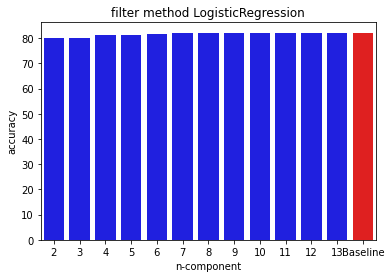

In [34]:
#LR_Mutual
filter_selecton(X_valid, y_valid, X_test, y_test,  LogisticRegression(random_state=0),"LogisticRegression",mutual_info_classif)

max mutal 82.20307370934049
Best value of n components:  8
['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']


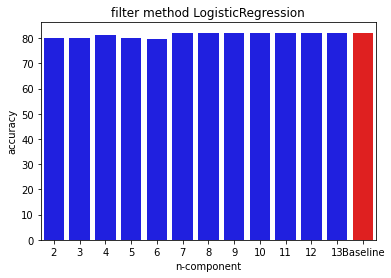

In [35]:
#LR_chi
filter_selecton(X_valid, y_valid, X_test, y_test,  LogisticRegression(random_state=0),"LogisticRegression",chi2)

Filter selection method is used to selecte best features to be used in model training, Mutual_info and Chi2 methods is used for feature selection the accuracy of Chi2 is highter than mutual info and the best number of feature is 8

# Model Training and Evaluation​



In [36]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [37]:
X_train_valid=pd.concat([X_train_Normalize, X_valid_Normalize], ignore_index=True)

In [38]:
X_train_valid.shape

(241266, 14)

In [39]:
X_train_valid=X_train_valid[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']]

In [40]:
X_train_valid.shape

(241266, 8)

In [41]:
y_train_valid=pd.concat([y_train,y_valid], ignore_index=True)

## Decision Tree


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     11939
           1       0.77      1.00      0.87     14869

    accuracy                           0.83     26808
   macro avg       0.88      0.81      0.82     26808
weighted avg       0.87      0.83      0.82     26808


Confusion Matrix:

[[ 7399  4540]
 [    9 14860]]

Accuracy Score:

0.8303118472097881
\Confusion Matrix Display:



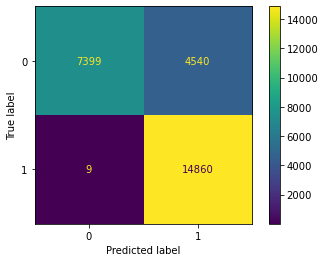

In [45]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT = DecisionTreeClassifier()
# Fit the model
DT.fit(X_train_valid,y_train_valid)
y_predict = DT.predict(X_test_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']])
get_accuracies(y_test,y_predict)

In [52]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=DT, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1)

grid_search.fit(X_valid_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']], y_valid)
grid_search.best_estimator_
grid_search.score(X_test[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']],y_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


0.827364965681886

In [57]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.62      0.76     11939
           1       0.77      1.00      0.87     14869

    accuracy                           0.83     26808
   macro avg       0.88      0.81      0.82     26808
weighted avg       0.87      0.83      0.82     26808


Confusion Matrix:

[[ 7400  4539]
 [    8 14861]]

Accuracy Score:

0.8303864518054312
\Confusion Matrix Display:



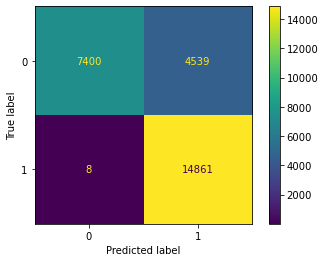

In [58]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
# Fit the model
DT.fit(X_train_valid,y_train_valid)
y_predict = DT.predict(X_test_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']])
get_accuracies(y_test,y_predict)

## crossvalidation

In [30]:
# plot the validation curve
from sklearn.model_selection import validation_curve
def plot_cv_indices(clf, X, y,param_name,parameter_range,  cv=10,model_name ="SVM"):
 
  train_score, test_score = validation_curve(clf, X, y,
                                       param_name = param_name,
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy",n_jobs=2)
 
# Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
  plt.title(f"Validation Curve with {model_name} Classifier")
  plt.xlabel(f"Value of {param_name}")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

In [33]:
from sklearn.model_selection import cross_val_score
def plot_cross_val_scores(scores):
  plt.bar(range(1,len(scores)+1,1) , scores, width=0.5)
  

  plt.title("The score for each train-and-validation run")
  plt.xlabel("train-and-validation run")
  plt.ylabel("Score")
  plt.show()

def mesure_cross_vall(clf, X_train, y_train, cv=10):
  scores = cross_val_score(clf, X_train, y_train, cv=cv)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  print("K-fold cross validation score: fo each ",scores)
  return scores

def evaluate_bias_variance(clf, X_train, y_train, X_test, y_test):
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',random_seed=123)
  print('Average expected loss: %.3f' % avg_expected_loss)
  print('Av erage bias: %.3f' % avg_bias)
  print('Average variance: %.3f' % avg_var)

def model_evaluation(clf, X_train, y_train,cv=10):
  scores = mesure_cross_vall(clf, X_train, y_train, cv)
  #plot_cross_val_scores(scores)
  # evaluate_bias_variance(clf, X_train, y_train, X_test, y_test)

Accuracy: 0.83 (+/- 0.01)
K-fold cross validation score: fo each  [0.81947035 0.82954122 0.83215218 0.82879523 0.81797837 0.82767624
 0.82245431 0.8261194  0.83022388 0.82052239]


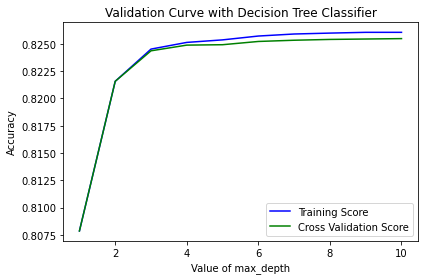

In [35]:
from sklearn.tree import DecisionTreeClassifier
clfDT = DecisionTreeClassifier(random_state=0)
model_evaluation(clfDT,X_valid, y_valid,cv=10)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clfDT, X_valid, y_valid ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")

## Logistic Regression


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     12229
           1       0.76      0.99      0.86     14579

    accuracy                           0.82     26808
   macro avg       0.87      0.81      0.81     26808
weighted avg       0.86      0.82      0.81     26808


Confusion Matrix:

[[ 7576  4653]
 [  126 14453]]

Accuracy Score:

0.8217323187108326
\Confusion Matrix Display:



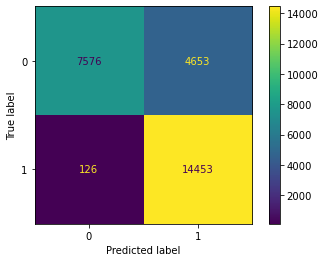

In [56]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_valid, y_train_valid)
y_pred=logisticRegr.predict(X_test_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']]) 
get_accuracies(y_test,y_pred)

In [54]:
#LR hyperparametertuning
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_valid_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']], y_valid)
best_clf.best_estimator_
best_clf.score(X_test_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']],y_test)


Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


0.4619516562220233

In [55]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.62      0.76     11939
           1       0.77      0.99      0.86     14869

    accuracy                           0.83     26808
   macro avg       0.87      0.81      0.81     26808
weighted avg       0.86      0.83      0.82     26808


Confusion Matrix:

[[ 7447  4492]
 [  156 14713]]

Accuracy Score:

0.8266189197254551
\Confusion Matrix Display:



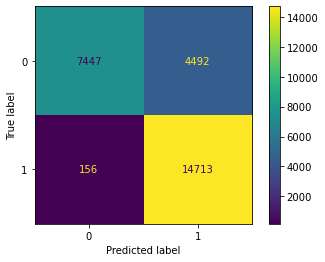

In [56]:
logisticRegr2 = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')
logisticRegr2.fit(X_train_valid, y_train_valid)
y_pred=logisticRegr2.predict(X_test_Normalize[['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'special', 'labels', 'sld']]) 
get_accuracies(y_test,y_pred)

# ٍSave Model

In [61]:
! pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9e4e7c1d353e7dcc0378535696899b7bbcde9bc09a9977f074fdf5603e67adb0
  Stored in directory: c:\users\saiko\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [63]:
import pickle

In [65]:

filename = 'finalized_model.sav'
pickle.dump(DT, open(filename, 'wb'))